# **Basic plots 2: Heatmap, Contour map, Radar chart, Dendrogam**

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

## Exercise 1 & 2:
Draw the contour and heatmap of temperature in 2008

In [ ]:
import pandas as pd

file = open('Homework_sampledata1.txt', 'r')
lines = file.readlines()
file.close()

lines = lines[1:]

for i in range(len(lines)):
    lines[i] = lines[i].split()[1:]

for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j] = float(lines[i][j])

all_days = lines.copy()
all_days = np.array(all_days)

all_days[all_days == -99] = np.nan
all_days = all_days.T

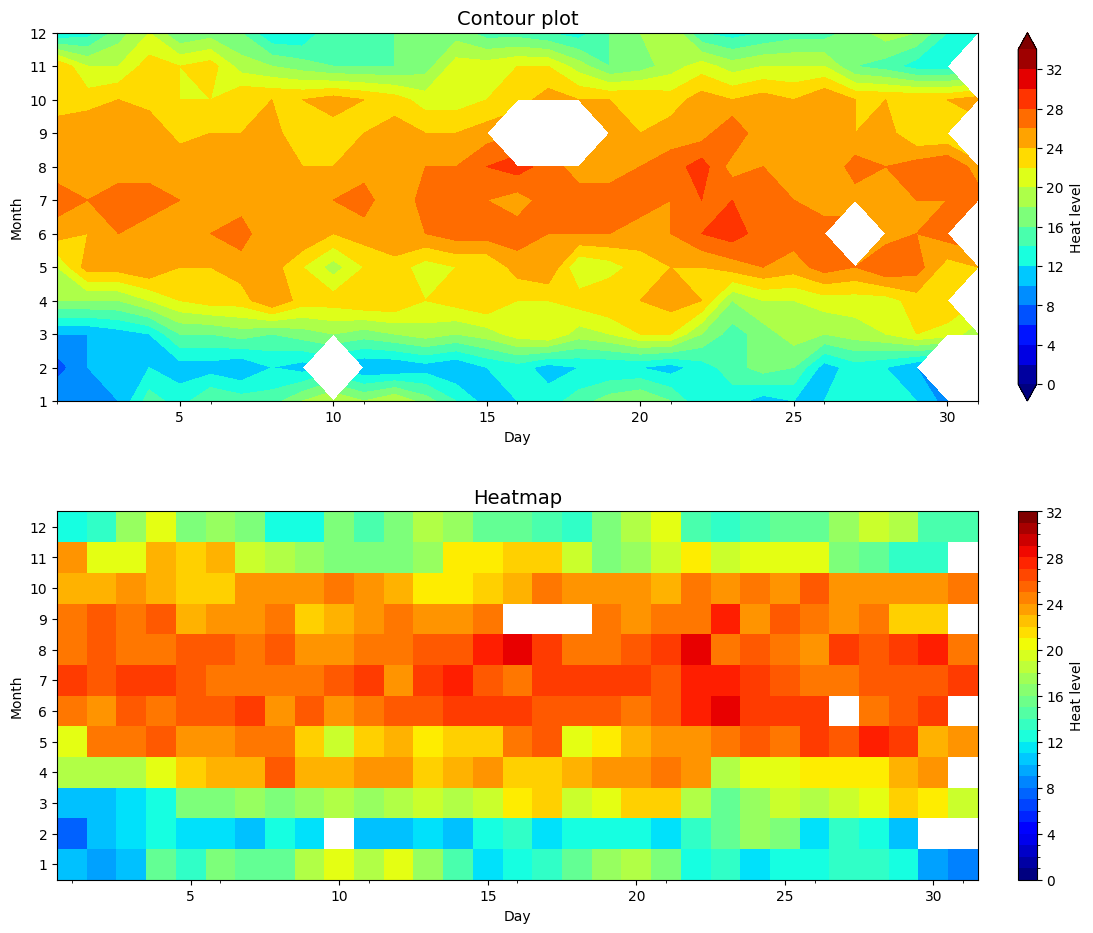

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

X, Y = np.meshgrid(np.arange(1, 32, 1), np.arange(1, 13, 1))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (13, 11))

# contour map
map = ax1.contourf(X, Y, all_days, levels=[i*2 for i in range(18)], cmap='jet', extend='both')
cbar = fig.colorbar(map, ax=ax1, fraction=0.046, pad=0.04)
cbar.set_label('Heat level', size=10)

ax1.set_xticks(np.arange(1, 32, 5), minor=True)
ax1.set_yticks(np.arange(1, 13, 1))
ax1.set_xlabel('Day', size=10)
ax1.set_ylabel('Month', size=10)
ax1.set_title('Contour plot', size=14)


# heatmap
all_days = np.floor(all_days)
map = ax2.pcolormesh(X, Y, all_days, cmap='jet', vmin=0, vmax=32)

# Color bar discretization with scalar levels
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.arange(0, 33, 2)
levels = np.linspace(0,32,9)
bounds = np.arange(33)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.arange(0, 33,1), cmap.N), cmap =cmap), ax = ax2, cmap=cmap, norm=norm, boundaries=bounds, ticks=levels, fraction=0.046, pad=0.04)
cbar.set_label('Heat level', size=10)

ax2.set_xticks(np.arange(1, 32, 5), minor=True)
ax2.set_yticks(np.arange(1, 13, 1))
ax2.set_xlabel('Day', size=10)
ax2.set_ylabel('Month', size=10)
ax2.set_title('Heatmap', size=14)

plt.subplots_adjust(hspace=0.3)

plt.show()

## Exercise 3:

Let's imagine the data above is a dataset with 12 samples, coresponding to 12 months. Each sample has 6 features, which is the mean every X days.

Feature 1 = mean (day1-day5)

Feature 2 = mean (day6-day10)

Feature 3 = mean (day11-day15)

Feature 4 = mean (day16-day20)

Feature 5 = mean (day21-day25)

Feature 6 = mean (day26-end of months)

Draw a radar chart for this dataset

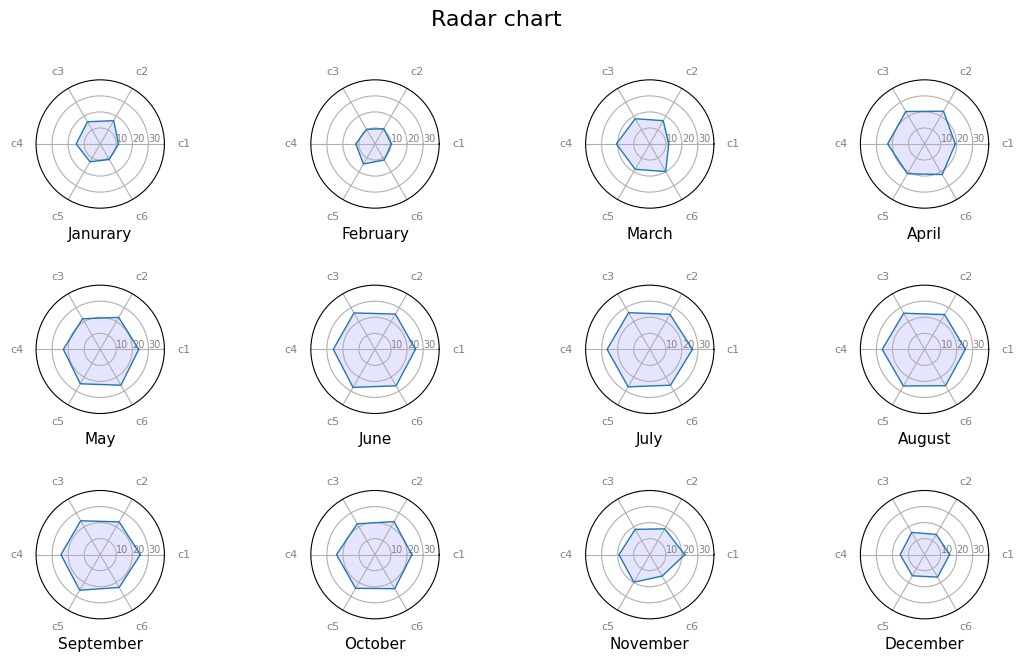

In [ ]:
from math import pi
mean_5d = np.zeros((12, 6))

for i in range(12):
    for j in range(6):
        count = 0
        avg = 0
        if j != 5:
            for k in range(5):
                if (not np.isnan(all_days[i][j*5+k])):
                    avg += all_days[i][j*5+k]
                    count += 1
            avg = avg/count
            mean_5d[i][j] = avg
        else:
            for k in range(6):
                if (not np.isnan(all_days[i][j*5+k])):
                    avg += all_days[i][j*5+k]
                    count += 1
            avg = avg/count
            mean_5d[i][j] = avg

no_category = np.size(mean_5d, 1)

list_month = ['Janurary', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
fig = plt.figure(figsize=(13, 7))
plt.suptitle('Radar chart', size=16)
for i in range(12):
    ax = plt.subplot(3, 4, i+1, polar=True)
    angles = [n / float(no_category) * 2 * pi for n in range(no_category)]
    angles += angles[:1]
    plt.xticks(angles[:-1], ['c1', 'c2', 'c3', 'c4', 'c5', 'c6' ], color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    data = np.concatenate((mean_5d[i,:], mean_5d[i,:1]))
    ax.plot(angles, data , linewidth=1, linestyle='solid')

    ax.fill(angles, data, 'b', alpha=0.1)

    plt.subplots_adjust(wspace=0.5, hspace=0.6)

    plt.title(list_month[i], size=11, y=-0.3)

plt.show()

## Exercise 4:

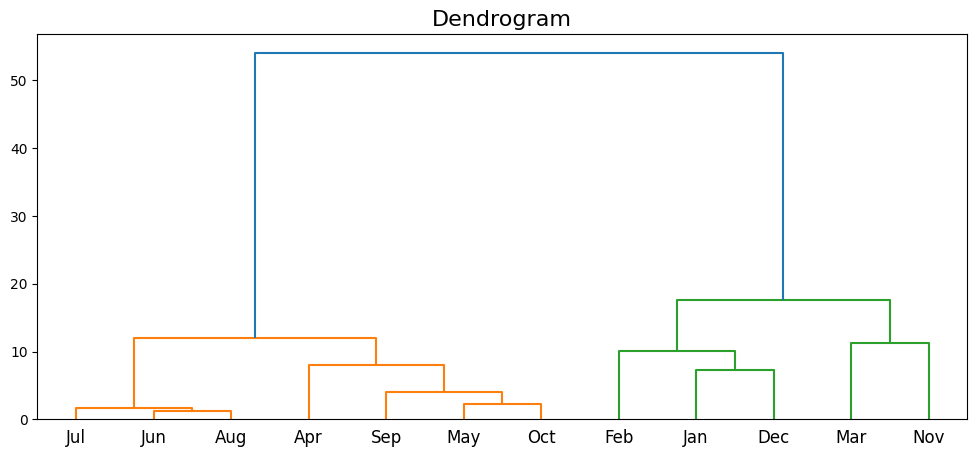

In [ ]:
# Using above dataset in exercise 3 to draw dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

list_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']

Z = linkage(mean_5d, 'ward')

plt.figure(figsize=(12, 5))
dendrogram(Z, labels=list_month)
plt.title('Dendrogram', size=16)
plt.show()